In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/employee_attrition.csv')
df.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,NaN,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,NaN,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,NaN,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,NaN,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
df.info()
#There is a dtype discrepancy when comparing to data dictionary. 'YearsAtCompany' should be an Int but is currently an object. 

df['YearsAtCompany'].dtype
#df['YearsAtCompany'].astype(int)
#Shows issue with variable input as '5!'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

dtype('O')

In [ ]:

#One of the variables is input as '5!' and is suspected to be a typo and will be replaced with 5.
df.replace(['5!'], [5], inplace = True)
df['YearsAtCompany'].value_counts()


5     195
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
26      4
25      4
31      3
32      3
29      2
36      2
27      2
23      2
30      1
40      1
37      1
34      1
5       1
Name: YearsAtCompany, dtype: int64

In [ ]:
df.YearsAtCompany = df.YearsAtCompany.astype(int)
#dtypes are now accurate and consistent w data dictionary


In [ ]:
#Find Duplicates
df.duplicated().any()
#No duplicates to address


False

In [ ]:
df.info()
#check for missing data
#There appears to be missing data in the 'Gender' Column as seen in 588 non-null values instead of 1470.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#Address missing data in 'Gender' Column
df['Gender'].value_counts()
# Only 'Female' was added as value in 'Gender' column. Given that the number of female respondents is 40% of the total observations, it can be assumed that the empty values are 'Male'. 
df['Gender'].fillna('Male', inplace = True)
df['Gender'].value_counts()
#Now reflects Male and Female values


Male      882
Female    588
Name: Gender, dtype: int64

In [ ]:
df.head()
#Check each column for categorical consistency and inappropriate data points

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.Age.value_counts()
#Appears accurate

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [ ]:
df.Attrition.value_counts()
#Appears accurate

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
df.BusinessTravel.value_counts()
#Appears accurate

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [ ]:
df.DailyRate.min()
df.DailyRate.max()
#Daily rate appears accurate and ranges $102-1499

1499

In [ ]:
df.Department.value_counts()
#Appears accurate

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
df.DistanceFromHome.max()
#Appears accurate. Employees commute 1-29 miles.


29

In [ ]:
df.Education.value_counts()
#Appears accurate.
#Education level: 1 = 'Below College'; 2 = 'College'; 3 = 'Bachelor'; 4 = 'Master'; 5 = 'Doctor'

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [ ]:
df.EducationField.value_counts()
#Appears accurate.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
df.EmployeeCount.value_counts()
#Appears accurate.

1    1470
Name: EmployeeCount, dtype: int64

In [ ]:
df.EnvironmentSatisfaction.value_counts()
#	Satisfaction with the environment: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High' 

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [ ]:
df.HourlyRate.max()
#Appears accurate range $30-100/hr

100

In [ ]:
df.JobInvolvement.value_counts()
#Satisfaction with the job: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High' 

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [ ]:
df.JobLevel.value_counts()
#Appears accurate

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [ ]:
df.JobRole.value_counts()
#Appears accurate

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [ ]:
df.JobSatisfaction.value_counts()
#Satisfaction with the job: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High' 

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [ ]:
df.MaritalStatus.value_counts()
#Appears accurate

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [ ]:
df.MonthlyIncome.max()
#Appears accurate. range $1009-19999

19999

In [ ]:
df.MonthlyRate.max()
#Appears accurate range 2094-26999


26999

In [ ]:
df.NumCompaniesWorked.value_counts()
#Appears accurate

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

In [ ]:
df.Over18.value_counts()
#Appears accurate

Y    1470
Name: Over18, dtype: int64

In [ ]:
df.OverTime.value_counts()
#Appears accurate

No     1054
Yes     416
Name: OverTime, dtype: int64

In [ ]:
df.PercentSalaryHike.value_counts()
#Appears accurate 11-25% salary increase

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [ ]:
df.PerformanceRating.value_counts()
#Appears accurate 
#Performance Rating: 1 = 'Low'; 2 = 'Good'; 3 = 'Excellent'; 4 = 'Outstanding'

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [ ]:
df.RelationshipSatisfaction.value_counts()
#Appears accurate 
#Relationship Satisfaction: 1 = 'Low'; 2 = 'Medium'; 3 = 'High'; 4 = 'Very High'

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [ ]:
df.StandardHours.value_counts()
#Appears accurate 

80    1470
Name: StandardHours, dtype: int64

In [ ]:
df.StockOptionLevel.value_counts()
#Appears accurate 

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [ ]:
df.TotalWorkingYears.max()
#Appears accurate range 0-40 years

40

In [ ]:
df.TrainingTimesLastYear.value_counts()
#Appears accurate 0-6 hours in training

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [ ]:
df.WorkLifeBalance.value_counts()
#Appears accurate 
#Work-life balance: 1 = 'Bad'; 2 = 'Good'; 3 = 'Better;' 4 = 'Best' 

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [ ]:
df.YearsAtCompany.max()
#Appears accurate 0-40 years 

40

In [ ]:
df.YearsInCurrentRole.value_counts()
#Appears accurate range 0-18 years

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

In [ ]:
df.YearsSinceLastPromotion.value_counts()
#Appears accurate range 0-15years

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [ ]:
df.YearsWithCurrManager.value_counts()
#Appears accurate range 0-17 years

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

In [ ]:
###Data is thoroughly cleaned and ready for exploratory analysis
#Code sourcing came from personal class notes pertaining to data cleaning


#Following seaborn code was informed by this youtube tutorial: https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

Text(0.5, 1.0, 'Attrition at Company X')

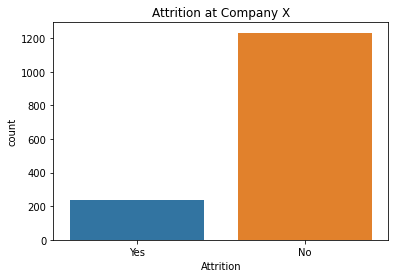

In [ ]:
#What is the rate of Attrition?
sns.countplot(x='Attrition', data=df)
plt.title('Attrition at Company X')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7f2ee52036d0>,
 [Text(0, 0, 'Bad'),
  Text(0, 0, 'Good'),
  Text(0, 0, 'Better'),
  Text(0, 0, 'Best')])

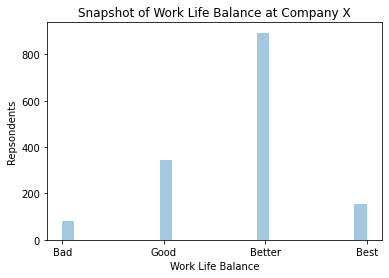

In [ ]:
#How is work life balance at this company?
sns.distplot(df['WorkLifeBalance'],kde = False, bins = 25)
plt.title('Snapshot of Work Life Balance at Company X')
plt.xlabel('Work Life Balance')
plt.ylabel('Repsondents')
plt.xticks([1, 2, 3, 4], ['Bad', 'Good', 'Better', 'Best'])
#Work-life balance: 1 = 'Bad'; 2 = 'Good'; 3 = 'Better;' 4 = 'Best' 

#referenced this code: https://www.kite.com/python/answers/how-to-set-tick-labels-with-matplotlib-in-python

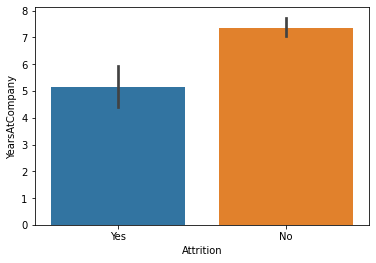

In [ ]:
sns.barplot(x='Attrition', y='YearsAtCompany', data=df) 
#This shows that employees who work for the company for lesser years are more likely to leave and those that leave stay for approximately five years with the company.

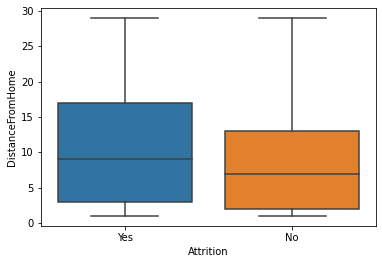

In [ ]:
#Is there a relationship between employee attrition and the distance they live from work?
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df) 
#This boxplot shows us that the distance of employees commute may influence attrition.

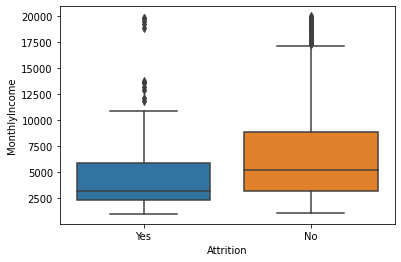

In [ ]:
#Is there a trend between income and attrition?
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df) 
#This boxplot shows us that employees earning lower incomes are more likely to leave the company. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if __name__ == '__main__':


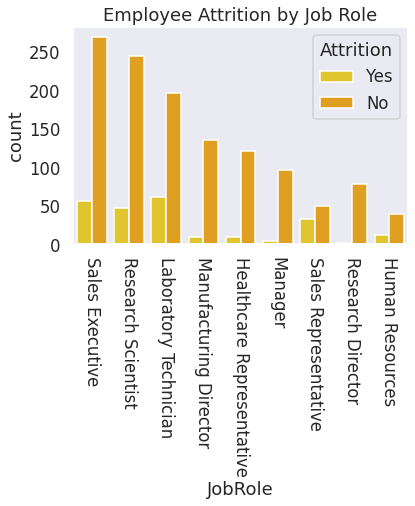

In [ ]:
#What types of employees are at higher risk of attrition?
sns.countplot(x='JobRole', data=df, hue='Attrition', palette = 'Wistia')
plt.title('Employee Attrition by Job Role', fontsize = 18)
plt.xticks(rotation=270)

#In this countplot we can observe that Lab technician is the role with highest attrition, followed by Sales Executive and Research Scientist.
#Do Lab Techs receive salary hikes? 

plt.tight_layout()
plt.savefig('attritionbyjobrole3.jpeg', dpi = 300, bbox_inches = "tight")

#code referenced from https://stackoverflow.com/questions/45239261/matplotlib-savefig-text-chopped-off

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

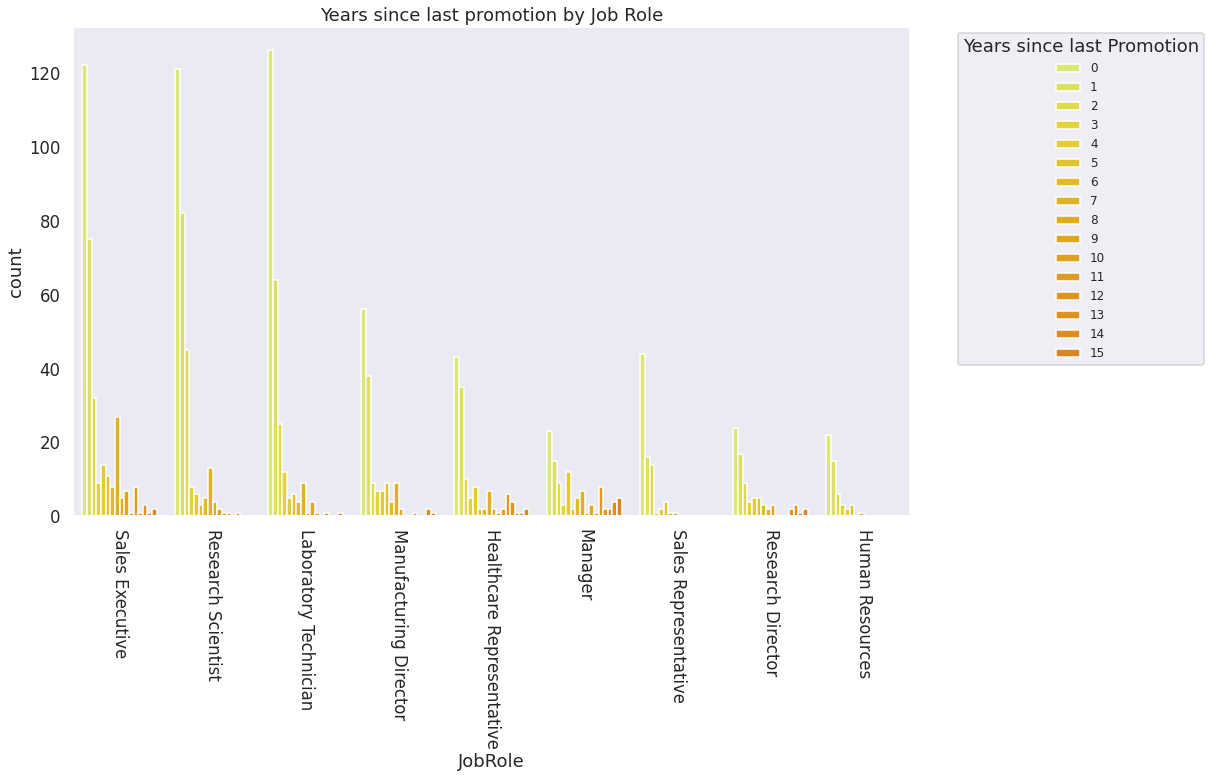

In [ ]:
plt.figure(figsize=(15,9))
sns.countplot(x='JobRole', data=df, palette = 'Wistia', hue='YearsSinceLastPromotion')
plt.title('Years since last promotion by Job Role', fontsize = 18)
plt.legend(fontsize=12, title='Years since last Promotion',bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks(rotation=270)

#This countplot shows that the job roles with highest attrition rates(Lab Tech, Sales Exec, and Research Scientist) have a sizable portion who have not received promots in 5+ years. 
#Recommendation to HR, consistent salary review may provide increased incentive for employees and increased rates of retention.


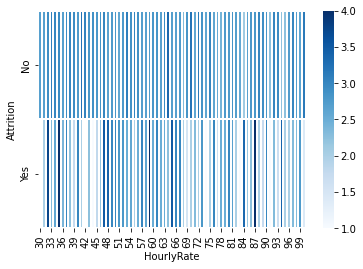

In [ ]:
mtx = df.pivot_table(index ='Attrition', columns='HourlyRate', values='JobSatisfaction')
sns.heatmap(mtx, cmap='Blues', linecolor='white', linewidth=1)

#This pivot table shows that employees that leave are more likely to have diverse experiences of job satisfaction, but job satisfaction is not the ultimate predictor of attrition. 
#There appears to be more employee attrition of employees who receive lower hourly rates than employees that earn higher hourly rates.

Text(0.5, 1.0, 'Employee Attrition analysed by Job Satisfaction and Hourly Rate')

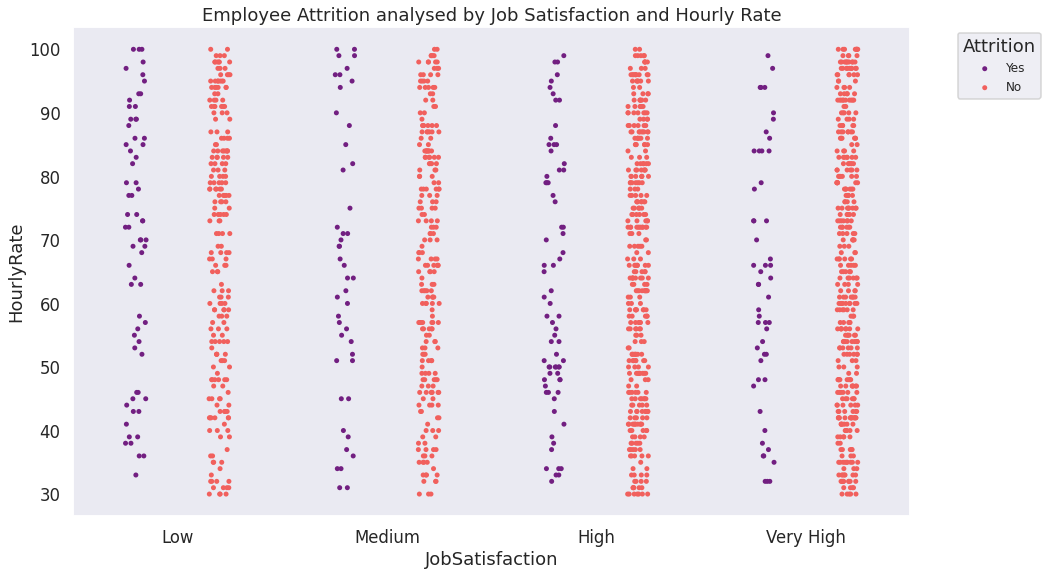

In [ ]:
plt.figure(figsize=(15,9))
sns.set_style('dark') 
sns.set_context('talk')
sns.stripplot(x='JobSatisfaction', y='HourlyRate', label=('Job Satisfaction', 'Hourly Rate'), palette = 'magma', data=df, jitter = True, hue = 'Attrition', dodge = True)
plt.xticks([0, 1, 2, 3], ['Low', 'Medium', 'High', 'Very High'])
plt.legend(fontsize=12, title='Attrition', labels=['Yes', 'No'],bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Employee Attrition analysed by Job Satisfaction and Hourly Rate', fontsize=18)

#This stripplot shows the distribution of employees that leave the company in terms of hourly rate and job satisfaction. We see that Employees that stay appear to have higher job satisfcation overall, and employees that leave appear to have varying degrees of job satisfaction.


#Referenced code in youtube tutorial: https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas